In [50]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.special import gamma

# Bessel process sampling

Course link: https://www.maths.univ-evry.fr/pages_perso/jeanblanc/conferences/Jordanie.pdf

## Explicit Euler-scheme

This way of implementing is not mathematically stable **[Numerical Probabiliy course at UPMC-X M2 Finance and Probabiliy, Gilles Pagès]**, as the process can become negative, which is forbidden. In practice, the result are pretty often good and this is indeed the way to sample Bessel processes for dimensions $\delta<2$ as the implicit methods gives wrong samples in this case.  

The demonstration of instability of implicit methods in the case $\delta<2$ for the forced implicit method, and in the case of $\delta<1$ for the implicit method by change of variable is given by **[Ikeda-Watanabe, 1981]**.

We recall that a Bessel process eventually comes back to 0 with probability 1 if $\delta<1$, and never comes back to 0 if $\delta>=2$. So the case $\delta>=2$ is totally irrelevant for us.

In [51]:
def explicit_bessel(delta, n):
  """
    Bessel process sampling between time [0,1], dimension delta, n points
    Using explicit Euler scheme
  """
  traj = np.zeros(n)
  w = np.random.normal(scale=1/np.sqrt(n), size=n)
  for i in range(1,n):
    traj[i] = traj[i-1] + delta/n + 2*np.sqrt(abs(traj[i-1]))*w[i-1]
  return np.sqrt(abs(traj))

Number of points of the trajectory below 0.1: 8473


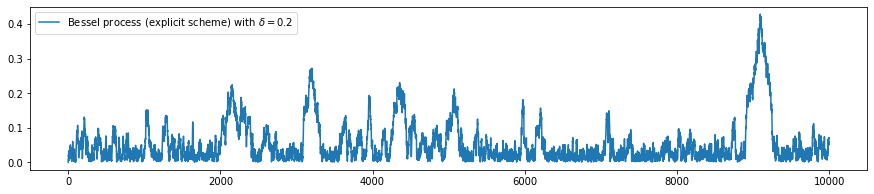

In [ ]:
delta = 0.2
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process (explicit scheme) with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 3355


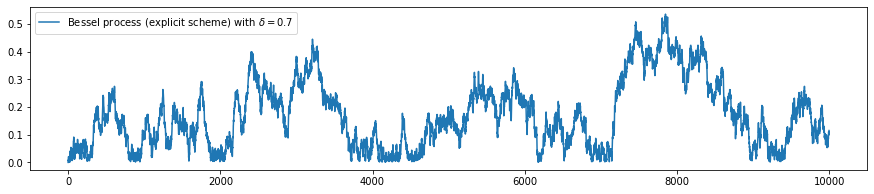

In [ ]:
delta = 0.7
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process (explicit scheme) with $\delta=$"+str(delta))
_ = plt.legend()

Number of points of the trajectory below 0.1: 5087


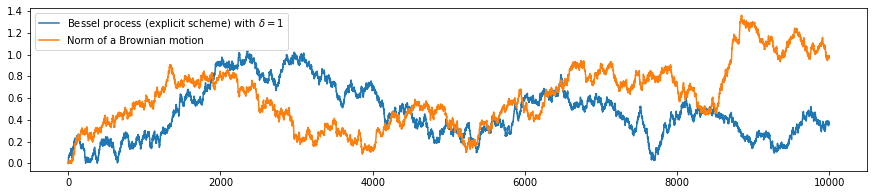

In [52]:
# Norm of a Brownian motion
delta = 1
n = 10000
traj1 = explicit_bessel(delta, n)
traj2 = abs(np.cumsum(np.random.normal(scale=1/np.sqrt(n), size=n)))

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj1, label="Bessel process (explicit scheme) with $\delta=$"+str(delta))
ax.plot(traj2, label="Norm of a Brownian motion")
_ = plt.legend()

In the exemple above, we compare a Bessel process with $\delta=1$ with the Euclidean norm of a Brownian motion, to check if the Bessel sampling seems to follow the correct dynamic. Here, the difference of dynamic is not visually clear, and better than the implicit scheme, that is why we chose the explicit scheme.

Number of points of the trajectory below 0.1: 180


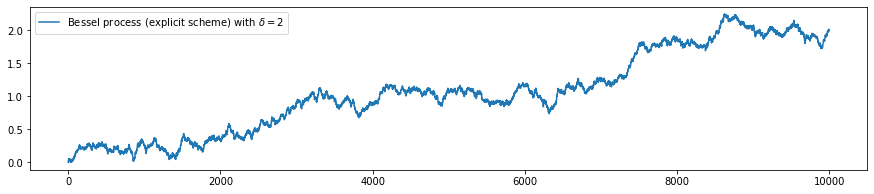

In [ ]:
delta = 2
n = 10000
traj = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Bessel process (explicit scheme) with $\delta=$"+str(delta))
_ = plt.legend()

Above is an other exemple to check the dynamic with $\delta=2$ which is the theoretical limit of $\delta$ from which the probability of hitting 0 after the initialization in the trajectory is 0. Here the trajectory is notably less near 0 than in the previous examples.

## Forced implicit Euler-scheme

With the implicit scheme, the process cannot become negative. However, this does not ensure stability. Indeed, the demonstration of instability of implicit methods in the case $\delta<2$ for the forced implicit method is given by **[Ikeda-Watanabe, 1981]**.

In [53]:
def implicit_bessel(delta, n):
  """
    Bessel process sampling between time [0,1], dimension delta, n points
    Using explicit Euler scheme
  """
  traj = np.zeros(n)
  w = np.random.normal(scale=1/np.sqrt(n), size=n)
  for i in range(1,n):
    traj[i] = (w[i] + np.sqrt(w[i]**2 + delta/n + traj[i-1]))**2
  return np.sqrt(abs(traj))

Number of points of the trajectory below 0.1: 5087


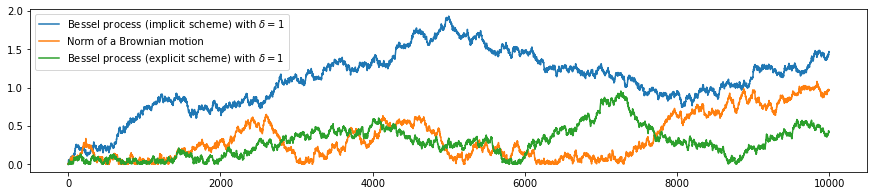

In [55]:
delta = 1
n = 10000
traj1 = implicit_bessel(delta, n)
traj2 = abs(np.cumsum(np.random.normal(scale=1/np.sqrt(n), size=n)))
traj3 = explicit_bessel(delta, n)

print("Number of points of the trajectory below 0.1:", (traj<1e-1).sum())

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj1, label="Bessel process (implicit scheme) with $\delta=$"+str(delta))
ax.plot(traj2, label="Norm of a Brownian motion")
ax.plot(traj3, label="Bessel process (explicit scheme) with $\delta=$"+str(delta))
_ = plt.legend()

The comparison with the Euclidean norm of a Brownian motion, which is equivalent to a Bessel process of dimension 1, shows the unstability of the implicit scheme in the case of $\delta \in ]0,2[$, looking much more like trajectory of dimension $\delta \geq 2$, which do not come back to 0.  
**It is clear in this example that the explicit scheme fits much more the dynamic than the implicit scheme.**

# Excursion length sorting

In [ ]:
def excursion_lengths(traj, thr=1e-1):
  """
  Take a Bessel process trajectory in input, an array of shape [n]
  Output an array of shape [n], with at index i the length of the i_th longest excursion around 0 o the trajectory
  """
  n = traj.shape[0]
  len_distrib = np.zeros(n)
  zeros = traj<thr
  zeros_ind = (np.cumsum(np.ones(n))-1)[zeros]
  lengths = zeros_ind[1:] - zeros_ind[:-1]
  for i in range(len(lengths)):
    len_distrib[i] = int(lengths[i])
  return -np.sort(-len_distrib)

## Cluster length distribution

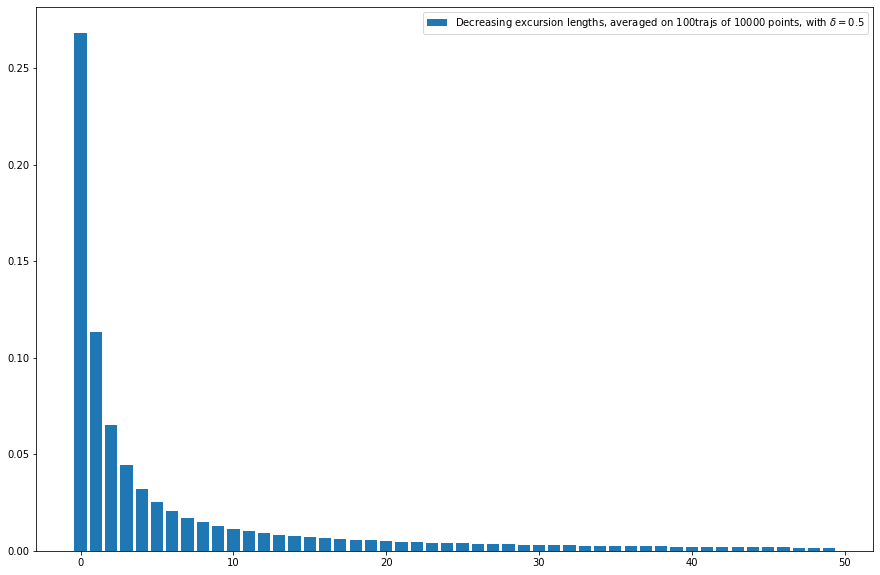

In [66]:
delta = 0.5
n = 10000
n_trajs = 100
thr = 2e-2

min_cluster = 0
max_cluster = 50

len_distrib = np.zeros(n)
for i in range(n_trajs):
  traj = explicit_bessel(delta, n)
  len_distrib += excursion_lengths(traj, thr=thr)
len_distrib /= n_trajs
len_distrib /= len_distrib.sum()

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(np.arange(min_cluster,max_cluster), len_distrib[min_cluster:max_cluster], label="Decreasing excursion lengths, averaged on "+str(n_trajs)+"trajs of "+str(n)+" points, with $\delta=$"+str(delta))
_ = plt.legend()

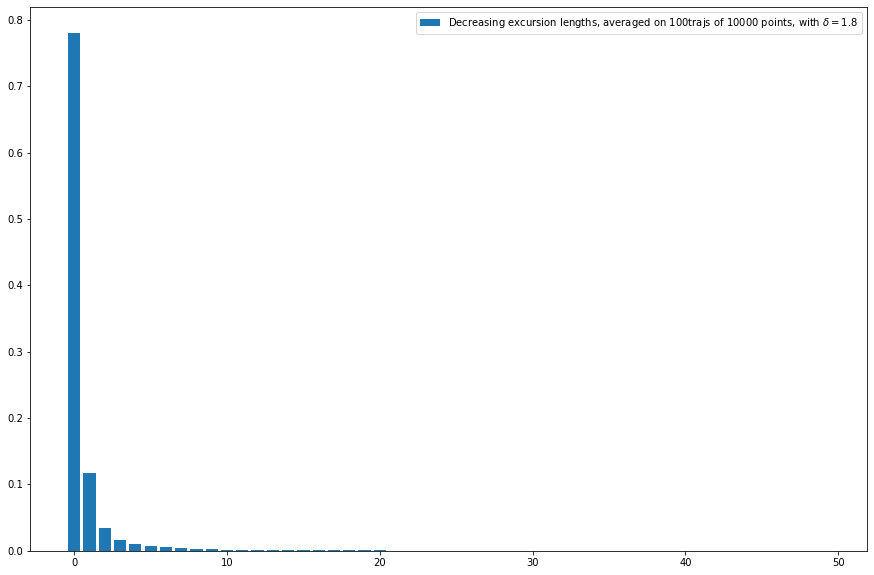

In [67]:
delta = 1.8
n = 10000
n_trajs = 100
thr = 2e-2

# Warning on the clusters of size 1, they are more than there should be, due to the discretization of the trajectory (cluster of size 1 contains many excursions of size strictly below too that shouldn't be there), and threshold to detect 0
min_cluster = 0
max_cluster = 50

len_distrib = np.zeros(n)
for i in range(n_trajs):
  traj = explicit_bessel(delta, n)
  len_distrib += excursion_lengths(traj, thr=thr)
len_distrib /= n_trajs
len_distrib /= len_distrib.sum()


fig, ax = plt.subplots(figsize=(15,10))
ax.bar(np.arange(min_cluster,max_cluster), len_distrib[min_cluster:max_cluster], label="Decreasing excursion lengths, averaged on "+str(n_trajs)+"trajs of "+str(n)+" points, with $\delta=$"+str(delta))
_ = plt.legend()

## Evolution of the number of clusters

### Threshold and discretization sensitivity

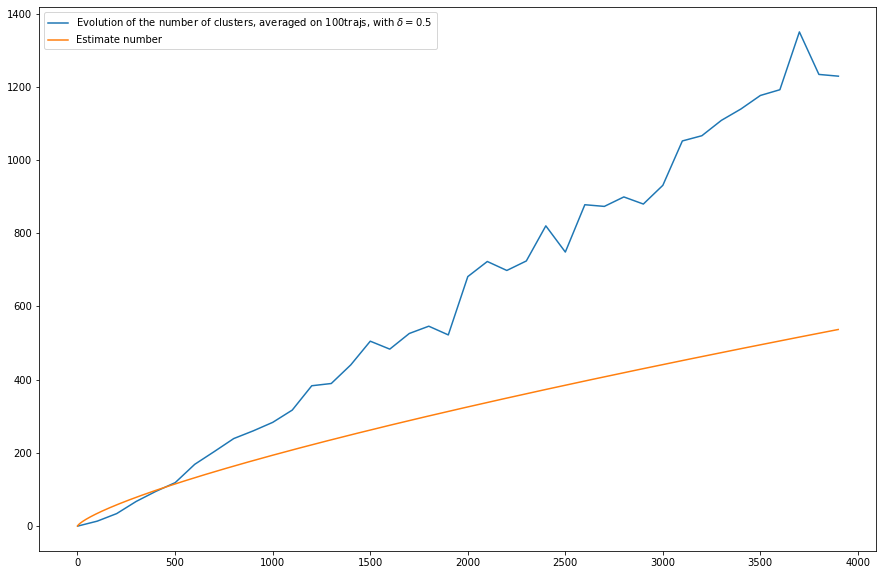

In [61]:
delta = 0.5 # delta = 2*(1-alpha) ie alpha = 3/4
alpha = 1-delta/2
n_trajs = 100
n_tab = np.arange(1,4000,100)
thr = 1e-1

nb_clusters = np.zeros(len(n_tab))
for i in range(len(n_tab)):
  for j in range(n_trajs):
    traj = explicit_bessel(delta, n_tab[i])
    nb_clusters[i] += (excursion_lengths(traj, thr=thr)>0).sum() 
nb_clusters /= n_trajs

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.array(n_tab), nb_clusters, label="Evolution of the number of clusters, averaged on "+str(n_trajs)+"trajs, with $\delta=$"+str(delta))
ax.plot(np.arange(n_tab[-1]), np.arange(n_tab[-1])**alpha/alpha/gamma(alpha), label="Estimate number")
_ = plt.legend()

The clusters of size 1 are too numerous, due the combination of time discretization and thresholding. Let's show the evolution with only clusters of size 2 or more.

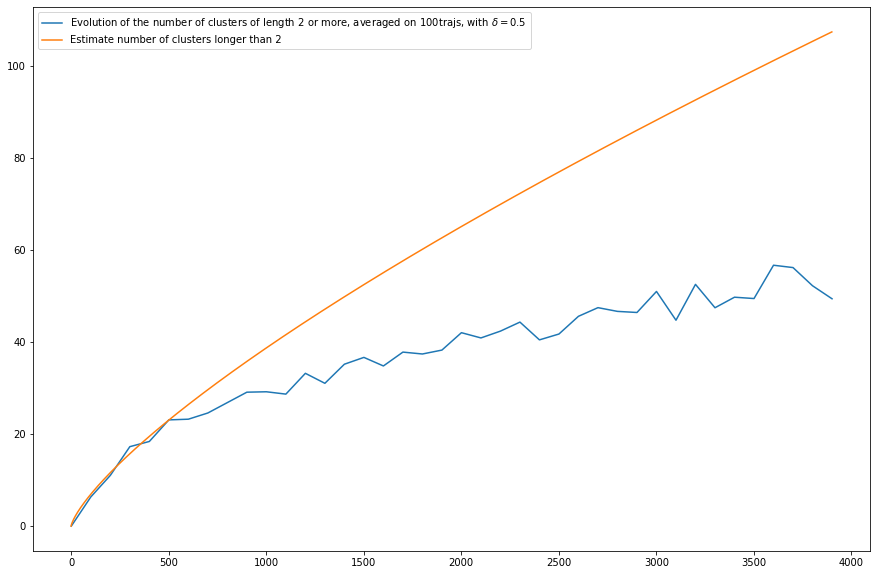

In [62]:
delta = 0.5 # delta = 2*(1-alpha) ie alpha = 3/4
alpha = 1-delta/2
n_trajs = 100
n_tab = np.arange(1,4000,100)
thr = 1e-1

nb_clusters = np.zeros(len(n_tab))
for i in range(len(n_tab)):
  for j in range(n_trajs):
    traj = explicit_bessel(delta, n_tab[i])
    nb_clusters[i] += (excursion_lengths(traj, thr=thr)>1).sum() # Discard the clusters of length 1, they are more than there should be, due to the discretization of the trajectory (cluster of size 1 contains many excursions of size strictly below too that shouldn't be there), and threshold to detect 0
nb_clusters /= n_trajs

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.array(n_tab), nb_clusters, label="Evolution of the number of clusters of length 2 or more, averaged on "+str(n_trajs)+"trajs, with $\delta=$"+str(delta))
ax.plot(np.arange(n_tab[-1]), np.arange(n_tab[-1])**alpha/alpha/gamma(alpha)/5, label="Estimate number of clusters longer than 2")
_ = plt.legend()

For longer clusters, the discretization has an other effet: when high excursions are detected, representing 1 cluster, there is a non-negligeable probability that the process indeed hits 0 within this interval, meaning that in reality this excursion is in fact 2 smaller ones. This results in diminishing the final amount of clusters, as the plot above can show.

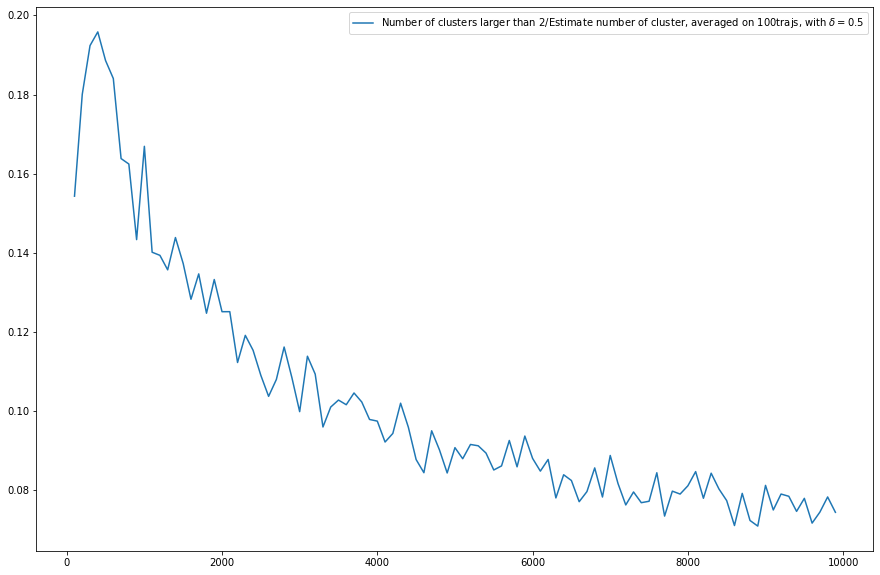

In [74]:
delta = 0.5 # delta = 2*(1-alpha) ie alpha = 3/4
alpha = 1-delta/2
n_trajs = 100
n_tab = np.arange(100,10000,100)
thr = 1e-1

nb_clusters = np.zeros(len(n_tab))
for i in range(len(n_tab)):
  for j in range(n_trajs):
    traj = explicit_bessel(delta, n_tab[i])
    nb_clusters[i] += (excursion_lengths(traj, thr=thr)>1).sum() # Discard the clusters of length 1, they are more than there should be, due to the discretization of the trajectory (cluster of size 1 contains many excursions of size strictly below too that shouldn't be there), and threshold to detect 0
nb_clusters /= n_trajs

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.array(n_tab), nb_clusters/(n_tab**alpha/alpha/gamma(alpha)), label="Number of clusters larger than 2/Estimate number of cluster, averaged on "+str(n_trajs)+"trajs, with $\delta=$"+str(delta))
_ = plt.legend()

As shown in the plot above, even discarding the clusters of size 1, the number of clusters does not follow the good asymptotic behavior.

Conclusion : The threshold and the discretization make this way of sampling particularly note conveniant numerically-speaking.

### Special case $\delta=1$

Let's focus on the special case $\delta=1$ where the Bessel process is a 1-D Brownian motion, which will be easier to manipulate, as we can detect 0-hits by change of sign.

In [68]:
def brownian_excursion_lengths(traj):
  """
  Take a Brownian motion trajectory in input, an array of shape [n]
  Output an array of shape [n], with at index i the length of the i_th longest excursion around 0 o the trajectory
  """
  n = traj.shape[0]
  len_distrib = np.zeros(n)
  zeros = np.append(traj[1:]*traj[:-1]<=0, False)
  zeros_ind = (np.cumsum(np.ones(n))-1)[zeros]
  lengths = zeros_ind[1:] - zeros_ind[:-1]
  for i in range(len(lengths)):
    len_distrib[i] = int(lengths[i])
  return -np.sort(-len_distrib)

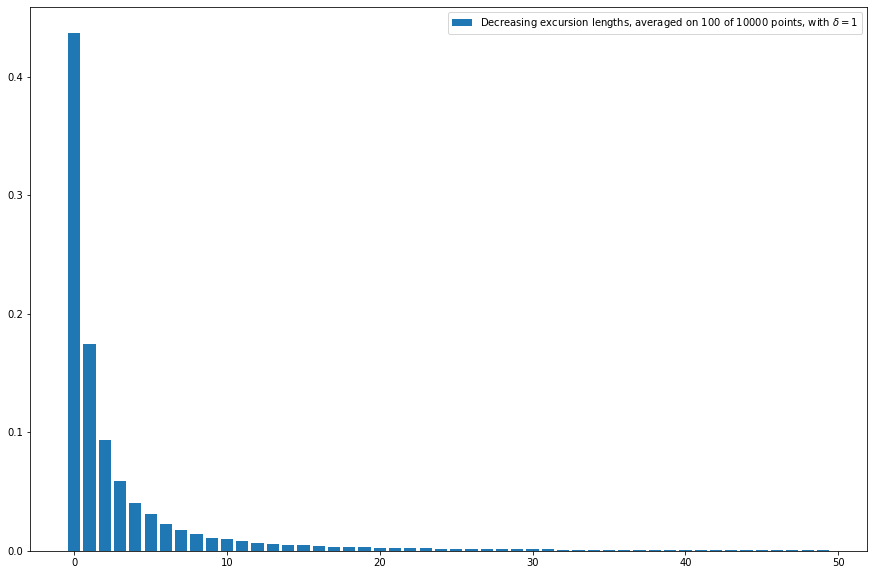

In [69]:
delta = 1
n = 10000
n_trajs = 100

min_cluster = 0
max_cluster = 50

len_distrib = np.zeros(n)
for i in range(n_trajs):
  traj = np.cumsum(np.random.normal(scale=1/np.sqrt(n), size=n))
  len_distrib += brownian_excursion_lengths(traj)
len_distrib /= n_trajs
len_distrib /= len_distrib.sum()


fig, ax = plt.subplots(figsize=(15,10))
ax.bar(np.arange(min_cluster,max_cluster), len_distrib[min_cluster:max_cluster], label="Decreasing excursion lengths, averaged on "+str(n_trajs)+" of "+str(n)+" points, with $\delta=$"+str(delta))
_ = plt.legend()

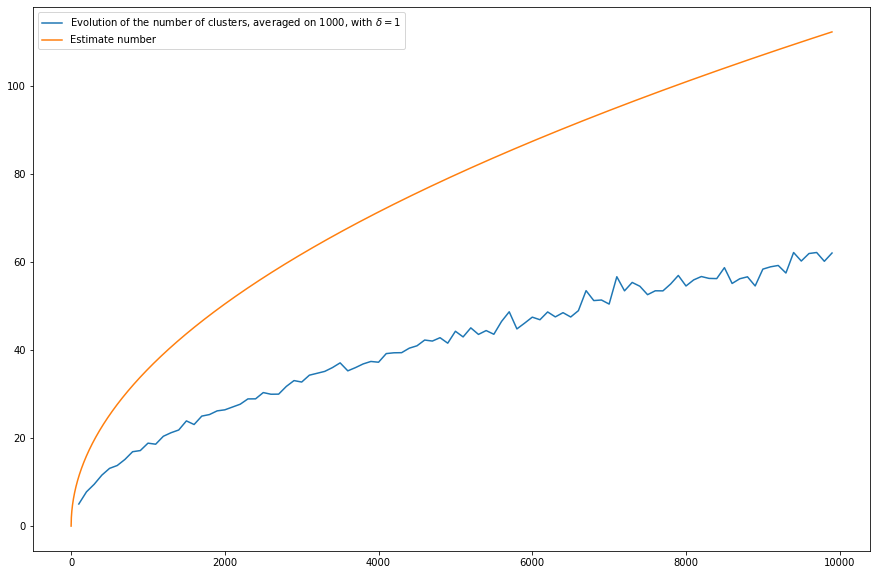

In [70]:
delta = 1 
alpha = 1-delta/2
n_trajs = 1000
n_tab = np.arange(100,10000,100)

nb_clusters = np.zeros(len(n_tab))
for i in range(len(n_tab)):
  for j in range(n_trajs):
    n = n_tab[i]
    traj = np.cumsum(np.random.normal(scale=1/np.sqrt(n), size=n))
    nb_clusters[i] += (brownian_excursion_lengths(traj)>0).sum()
nb_clusters /= n_trajs

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.array(n_tab), nb_clusters, label="Evolution of the number of clusters, averaged on "+str(n_trajs)+", with $\delta=$"+str(delta))
ax.plot(np.arange(n_tab[-1]), np.arange(n_tab[-1])**alpha/alpha/gamma(alpha), label="Estimate number")
_ = plt.legend()

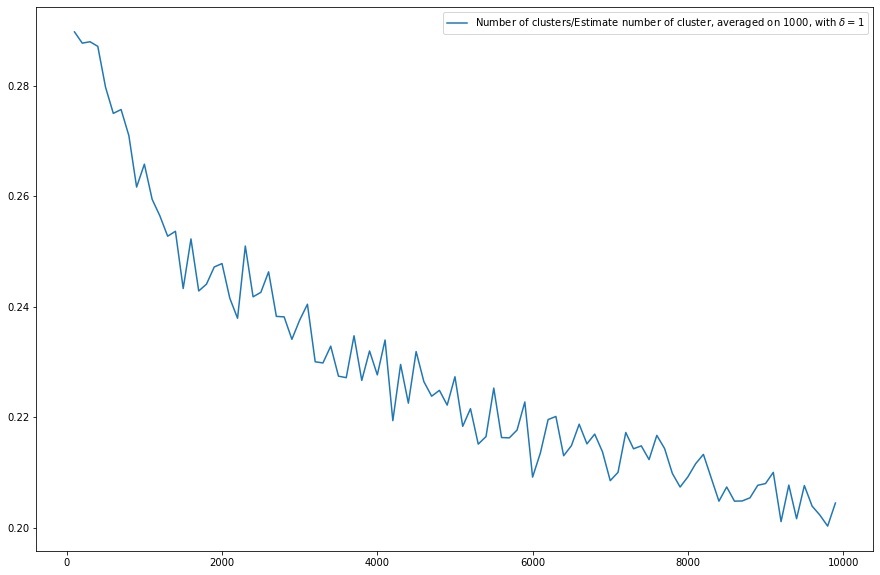

In [ ]:
delta = 1 
alpha = 1-delta/2
n_trajs = 1000
n_tab = np.arange(100,10000,100)

nb_clusters = np.zeros(len(n_tab))
for i in range(len(n_tab)):
  for j in range(n_trajs):
    n = n_tab[i]
    traj = np.cumsum(np.random.normal(scale=1/np.sqrt(n), size=n))
    nb_clusters[i] += (brownian_excursion_lengths(traj)>0).sum()
nb_clusters /= n_trajs

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.array(n_tab), nb_clusters/(n_tab**alpha/alpha/gamma(alpha)), label="Number of clusters/Estimate number of cluster, averaged on "+str(n_trajs)+", with $\delta=$"+str(delta))
_ = plt.legend()

The result are better in this special case and the computation are much quicker. The average number of cluster is below the theoretical expectation. Indeed, even if working on the Brownian and not the Bessel process is easier to detect excursions, it is still a discretized trajectory: if 2 excursions of same sign are separated by a tiny area (containing 0) between to points of the grid, the all pattern will be considered as only 1 excursion, which obviously diminishes the overall number of clusters.  
The number of clusters approximately increases at the correct asymptotical rate as shown in the last plot.

**Conclusion:** In this state, sampling Kingman distributions using Bessel processes is not relevant dur to numerical complexities. To make it more relevant, a different approach can be used to detect 0-hits by computing between 2 steps the probability of hitting 0, and under a probability threshold counting a hit, or refining the computation by sampling a Bessel bridge between the points for intermediate probabilities. However, this requires further analysis to analytically compute the probability to hit 0 for a Bessel bridge.

# Extension: Brownian bridge to sample $PY(1/2, 1/2)$

When sampling a Brownian bridge instead of a Brownian motion, the decreasing excursion length follow $PY(1/2, 1/2)$, and this distribution is illustrated below.

In [71]:
def brownian_bridge(n):
  """
    Output a Brownian bridge sampling between time [0,1], dimension delta, n points, initial point B_0=0 and final point B_1=0
    With Z_t Brownian motion, use the fact that Z_t - t*Z_1 is a Brownian bridge
  """
  w = np.cumsum(np.random.normal(scale=1/np.sqrt(n), size=n))
  t = np.arange(n)/(n-1)
  return w - t*w[-1]

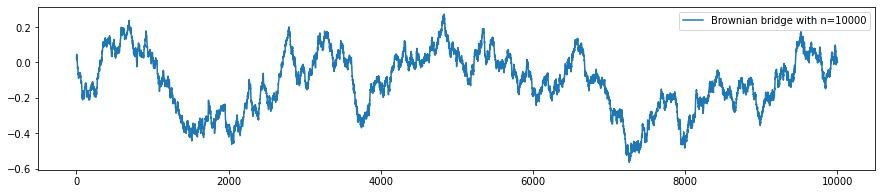

In [ ]:
delta = 1
n = 10000
traj = brownian_bridge(n)

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(traj, label="Brownian bridge with n="+str(n))
_ = plt.legend()

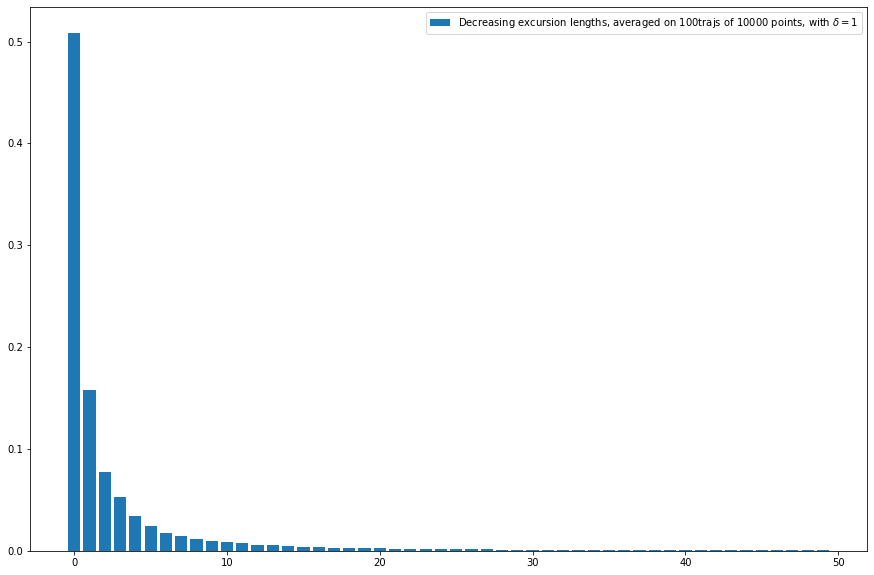

In [72]:
delta = 1
n = 10000
n_trajs = 100

min_cluster = 0
max_cluster = 50

len_distrib = np.zeros(n)
for i in range(n_trajs):
  traj = brownian_bridge(n)
  len_distrib += brownian_excursion_lengths(traj)
len_distrib /= n_trajs
len_distrib /= len_distrib.sum()


fig, ax = plt.subplots(figsize=(15,10))
ax.bar(np.arange(min_cluster,max_cluster), len_distrib[min_cluster:max_cluster], label="Decreasing excursion lengths, averaged on "+str(n_trajs)+"trajs of "+str(n)+" points, with $\delta=$"+str(delta))
_ = plt.legend()

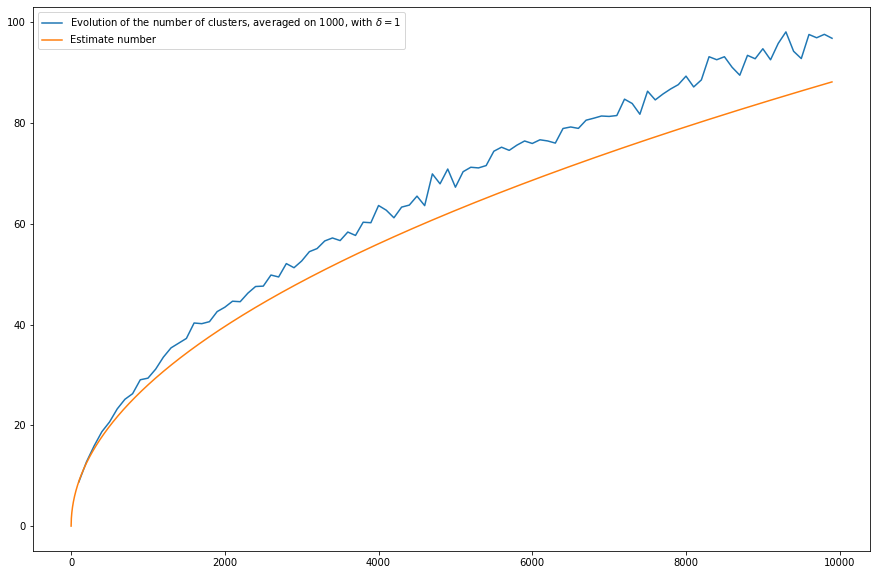

In [79]:
delta = 1 
alpha = 1-delta/2
n_trajs = 1000
n_tab = np.arange(100,10000,100)

nb_clusters = np.zeros(len(n_tab))
for i in range(len(n_tab)):
  for j in range(n_trajs):
    n = n_tab[i]
    traj = brownian_bridge(n)
    nb_clusters[i] += (brownian_excursion_lengths(traj)>0).sum()
nb_clusters /= n_trajs

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.array(n_tab), nb_clusters, label="Evolution of the number of clusters, averaged on "+str(n_trajs)+", with $\delta=$"+str(delta))
ax.plot(np.arange(n_tab[-1]), np.arange(n_tab[-1])**alpha*gamma(alpha+1)/gamma(2*alpha), label="Estimate number")
_ = plt.legend()

In the case of Brownian bridge, the results about the number of clusters are quite accurate, about 10% above the expectation but following the asymptotical dynamic as shown in the plot below.

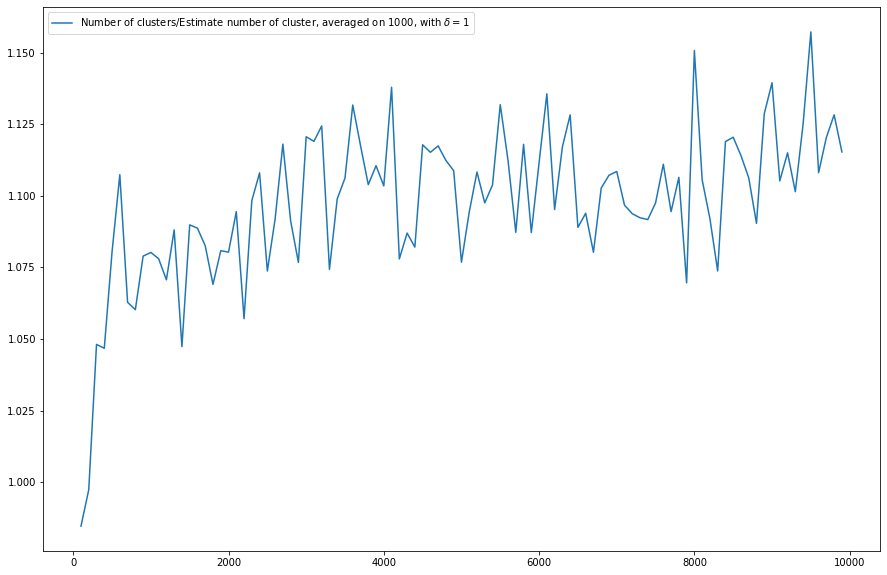

In [78]:
delta = 1 
alpha = 1-delta/2
n_trajs = 1000
n_tab = np.arange(100,10000,100)

nb_clusters = np.zeros(len(n_tab))
for i in range(len(n_tab)):
  for j in range(n_trajs):
    n = n_tab[i]
    traj = brownian_bridge(n)
    nb_clusters[i] += (brownian_excursion_lengths(traj)>0).sum()
nb_clusters /= n_trajs

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.array(n_tab), nb_clusters/(n_tab**alpha*gamma(alpha+1)/gamma(2*alpha)), label="Number of clusters/Estimate number of cluster, averaged on "+str(n_trajs)+", with $\delta=$"+str(delta))
_ = plt.legend()

The Brownian bridge gives good results to sample $PY(1/2, 1/2)$, better than the previous processes.  
An extension of this part to sample distribution from $PY(\alpha, \alpha)$ is to sample Bessel bridges and process the same operations as above. The sampling of such bridges is nevertheless out of the scope of this project.
